In [1]:
from my_bert import *

2022-12-07 15:00:58.281037: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import pandas as pd
from ast import literal_eval
from bertopic import BERTopic

In [3]:
df = pd.read_csv("cyberbullying_tweets_cleaned.csv", converters={'cleaned_text':literal_eval})

In [4]:
df

,tweet_text,cyberbullying_type,label,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,"[in, other, words, katandandre, your, food, wa..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,"[why, is, aussietv, so, white, mkr, theblock, ..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,"[a, classy, whore, or, more, red, velvet, cupc..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,"[meh, p, thanks, for, the, heads, up, but, not..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,"[this, is, an, isis, account, pretending, to, ..."
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,5,"[black, ppl, are, not, expected, to, do, anyth..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,5,"[turner, did, not, withhold, his, disappointme..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,5,"[i, swear, to, god, this, dumb, nigger, bitch,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,5,"[yea, fuck, you, rt, if, youre, a, nigger, fuc..."


In [5]:
docs = [
    [' '.join(x) for x in df.loc[df.label==0].cleaned_text.tolist()],
    [' '.join(x) for x in df.loc[df.label==1].cleaned_text.tolist()],
    [' '.join(x) for x in df.loc[df.label==2].cleaned_text.tolist()],
    [' '.join(x) for x in df.loc[df.label==3].cleaned_text.tolist()],
    [' '.join(x) for x in df.loc[df.label==4].cleaned_text.tolist()],
    [' '.join(x) for x in df.loc[df.label==5].cleaned_text.tolist()]
]

In [6]:
# setup for training
docs_all = [' '.join(x) for x in df['cleaned_text'].tolist()]

In [33]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

topic_model, topics, probs = train_and_save(topic_model, docs_all)

Training model with 47692 docs


Batches:   0%|          | 0/1491 [00:00<?, ?it/s]

2022-11-29 22:17:35,971 - BERTopic - Transformed documents to Embeddings
2022-11-29 22:18:19,201 - BERTopic - Reduced dimensionality
2022-11-29 22:26:55,435 - BERTopic - Clustered reduced embeddings


CPU Execution time: 889.388493599 seconds


/opt/apps/Module/jupyterhub/2021.11/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [7]:
topic_models = []
all_topics = []
all_probs = []

for curr_doc in docs:
    curr_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
    curr_topic_model, curr_topics, curr_probs = train_and_save(curr_topic_model, curr_doc)
    
    topic_models.append(curr_topic_model)
    all_topics.append(curr_topics)
    all_probs.append(curr_probs)

Training model with 7945 docs


Batches:   0%|          | 0/249 [00:00<?, ?it/s]

2022-12-07 15:03:50,074 - BERTopic - Transformed documents to Embeddings
2022-12-07 15:04:18,187 - BERTopic - Reduced dimensionality
2022-12-07 15:04:22,571 - BERTopic - Clustered reduced embeddings


CPU Execution time: 193.970725936 seconds


/opt/apps/Module/jupyterhub/2021.11/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Training model with 7973 docs


Batches:   0%|          | 0/250 [00:00<?, ?it/s]

2022-12-07 15:04:36,348 - BERTopic - Transformed documents to Embeddings
2022-12-07 15:04:53,076 - BERTopic - Reduced dimensionality
2022-12-07 15:04:58,097 - BERTopic - Clustered reduced embeddings


CPU Execution time: 194.113646638 seconds


/opt/apps/Module/jupyterhub/2021.11/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Training model with 7998 docs


Batches:   0%|          | 0/250 [00:00<?, ?it/s]

2022-12-07 15:05:05,369 - BERTopic - Transformed documents to Embeddings
2022-12-07 15:05:35,160 - BERTopic - Reduced dimensionality
2022-12-07 15:05:38,806 - BERTopic - Clustered reduced embeddings


CPU Execution time: 361.45283680100005 seconds
Training model with 7823 docs


Batches:   0%|          | 0/245 [00:00<?, ?it/s]

2022-12-07 15:05:45,772 - BERTopic - Transformed documents to Embeddings
2022-12-07 15:06:16,948 - BERTopic - Reduced dimensionality
2022-12-07 15:06:23,326 - BERTopic - Clustered reduced embeddings


CPU Execution time: 371.20808363100014 seconds


/opt/apps/Module/jupyterhub/2021.11/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Training model with 7992 docs


Batches:   0%|          | 0/250 [00:00<?, ?it/s]

2022-12-07 15:06:31,772 - BERTopic - Transformed documents to Embeddings
2022-12-07 15:07:02,171 - BERTopic - Reduced dimensionality
2022-12-07 15:07:06,251 - BERTopic - Clustered reduced embeddings


CPU Execution time: 331.15856068799985 seconds
Training model with 7961 docs


Batches:   0%|          | 0/249 [00:00<?, ?it/s]

2022-12-07 15:07:14,320 - BERTopic - Transformed documents to Embeddings
2022-12-07 15:07:43,046 - BERTopic - Reduced dimensionality
2022-12-07 15:07:47,102 - BERTopic - Clustered reduced embeddings


CPU Execution time: 313.029997824 seconds


/opt/apps/Module/jupyterhub/2021.11/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [22]:
res = []
for topic_model in topic_models:
    temp = []
    for i in range(20):
        topic = topic_model.get_topic(i)
        if topic != False:
            temp.append([x[0] for x in topic])
    res.append(temp)

In [27]:
i=0
for topics in res:
    print(i)
    for topic in topics:
        print(",".join(topic))
    i+=1

0
bullying,de,que,eu,se,isso,bulling,por,com,el
bully,bullied,bullying,video,stop,he,to,you,your,schools
school,college,high,go,to,break,at,am,do,back
andre,kat,mkr,and,amp,are,they,hope,fuck,be
mkr,bless,two,masterchef,fuck,round,what,oh,dee,background
twitter,tweet,tweets,facebook,past,to,on,you,is,tweeting
women,men,yesallwomen,woman,are,rt,feminists,tech,not,to
islam,muslim,muslims,islamic,of,mohammed,religion,rt,is,what
blahhh,va,excellent,wow,good,more,,,,
evidence,article,stupid,false,conspiracy,data,that,you,idiot,brain
class,classes,teacher,algebra,my,in,hate,go,math,course
colin,mkr,robert,fassnidge,tasteofsydney,his,tsk,shirt,collin,host
breakfast,chicken,meatballs,mkr,livers,liver,pizza,egg,food,dinner
rt,yrs,tone,1600,takedown,this,see,joke,oh,rts
kat,fair,mkr,she,score,her,strategically,hypocrite,bloody,is
annie,lloyd,celine,vicky,mkr,amp,sudden,and,based,emile
blocked,ggautoblocker,bot,block,spam,user,tech,email,account,have
instant,restaurants,restaurant,round,another,k

In [34]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,21874,-1_my_jokes_the_rape
1,0,1022,0_india_hindu_hindus_pakistan
2,1,932,1_muslim_idiots_idiot_muslims
3,2,625,2_she_girl_her_bullied
4,3,580,3_mkr_mkr2015_teams_round


In [35]:
topic_model.get_topic(0)  # Select the most frequent topic

[('india', 0.015861560844147877),
 ('hindu', 0.013623462672538082),
 ('hindus', 0.012464897563338918),
 ('pakistan', 0.010299385238317587),
 ('terrorism', 0.009854882263680753),
 ('islamic', 0.008991693865834085),
 ('indian', 0.008394018183870314),
 ('kashmir', 0.008367636857406725),
 ('muslims', 0.008112776592213973),
 ('idiot', 0.006795584162449326)]

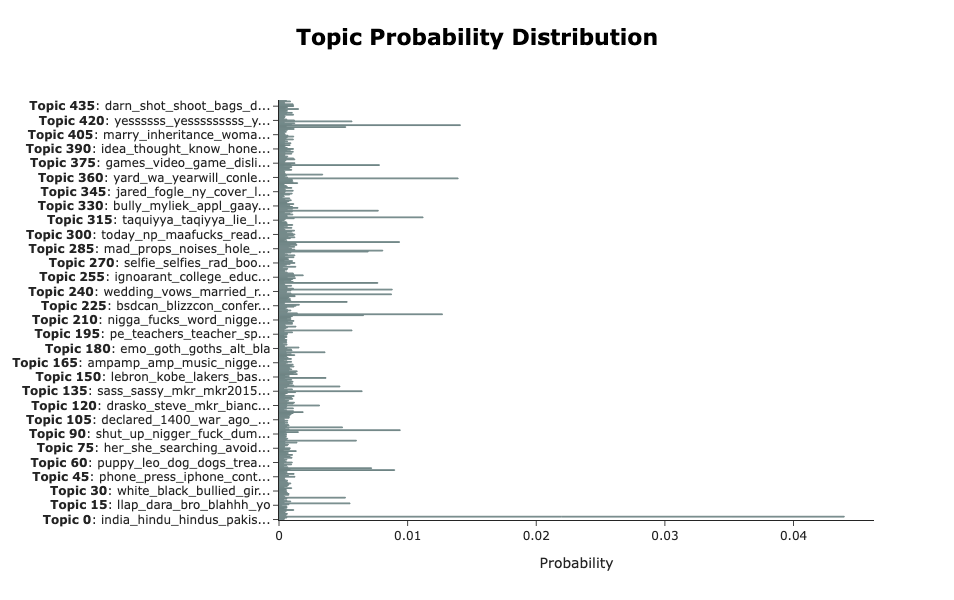

In [37]:
topic_model.visualize_distribution(probs[1], min_probability=0.)

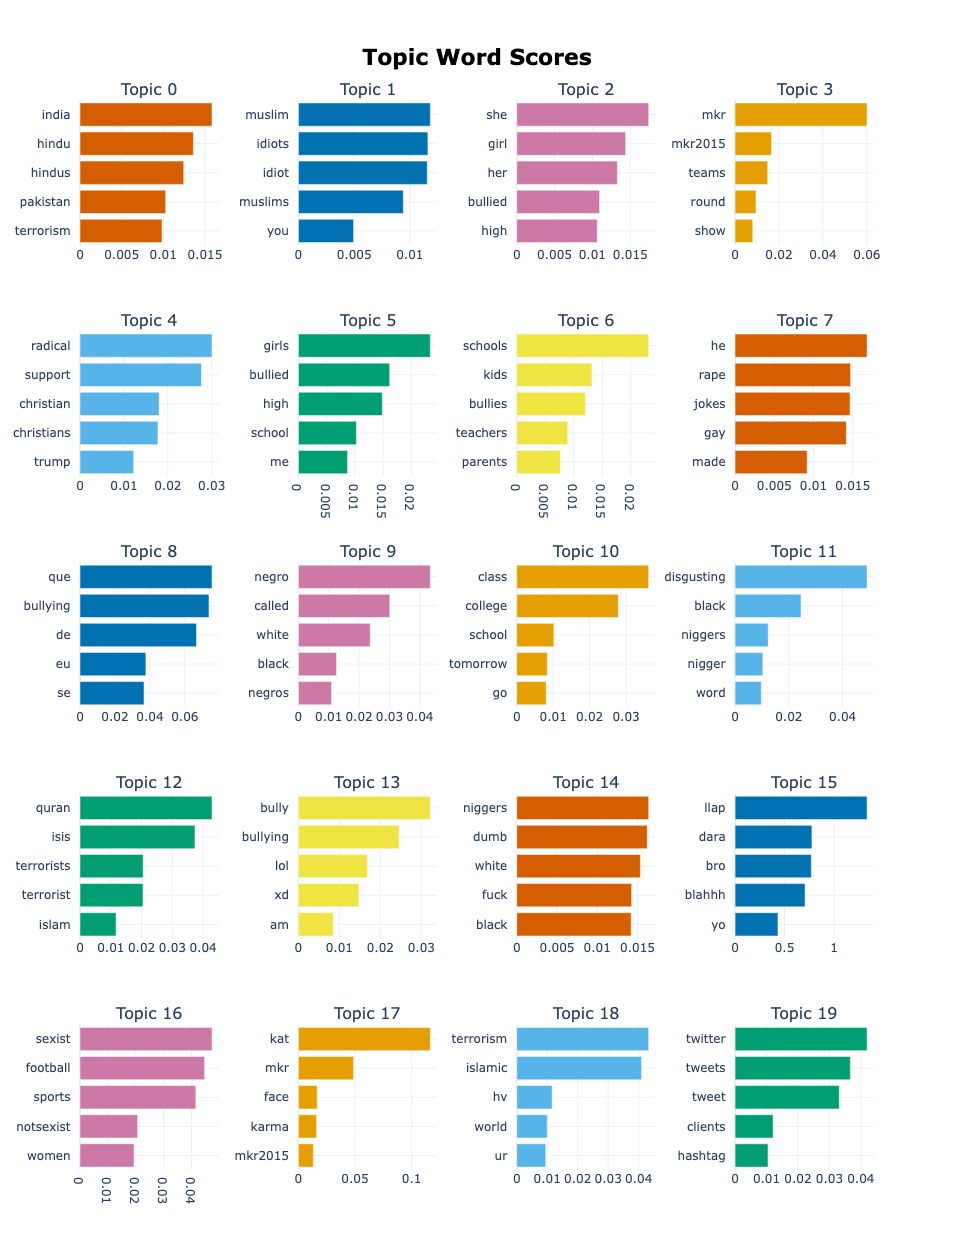

In [43]:
topic_model.visualize_barchart(top_n_topics=20)

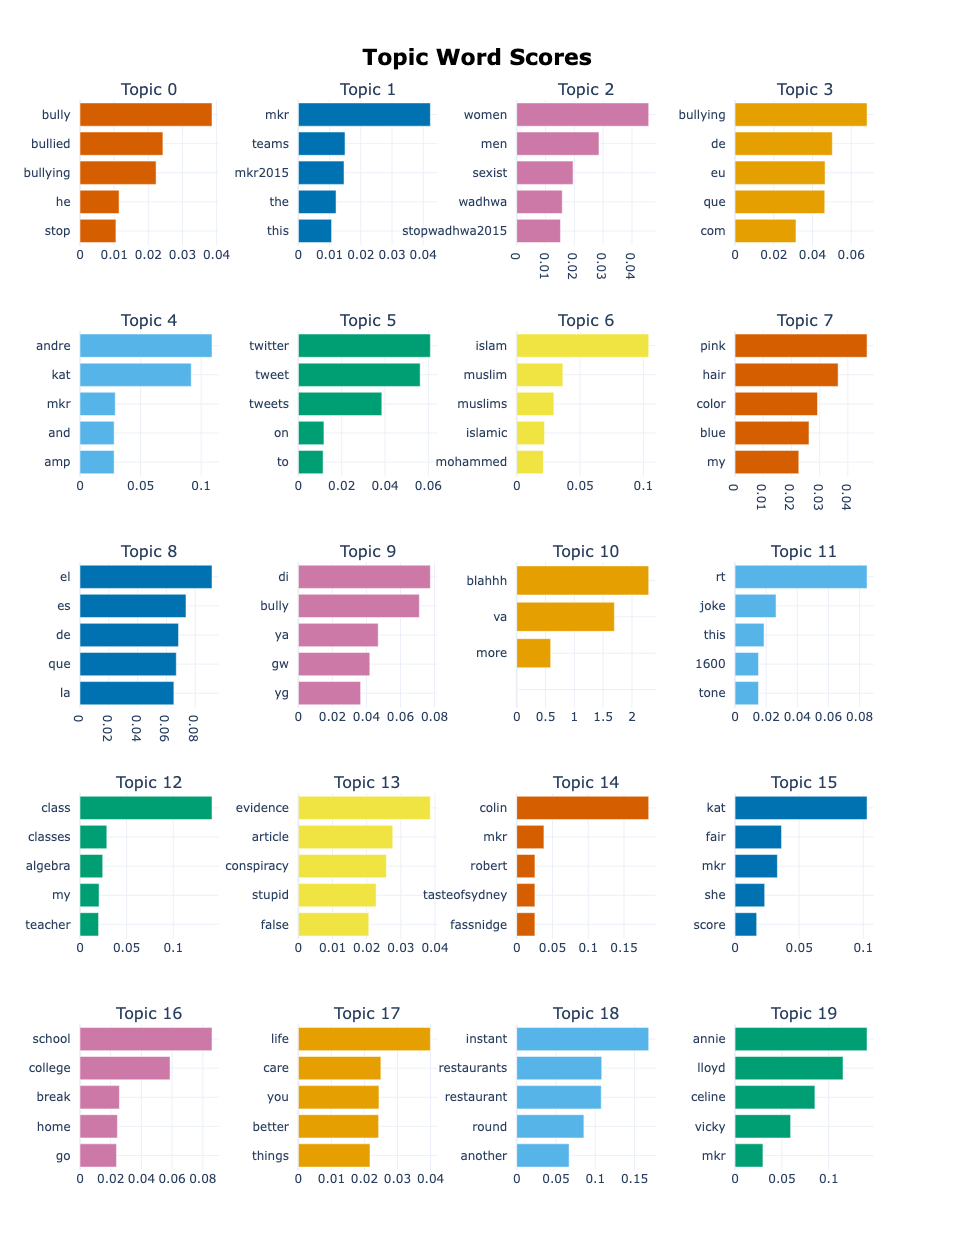

In [56]:
topic_models[0].visualize_barchart(top_n_topics=20)

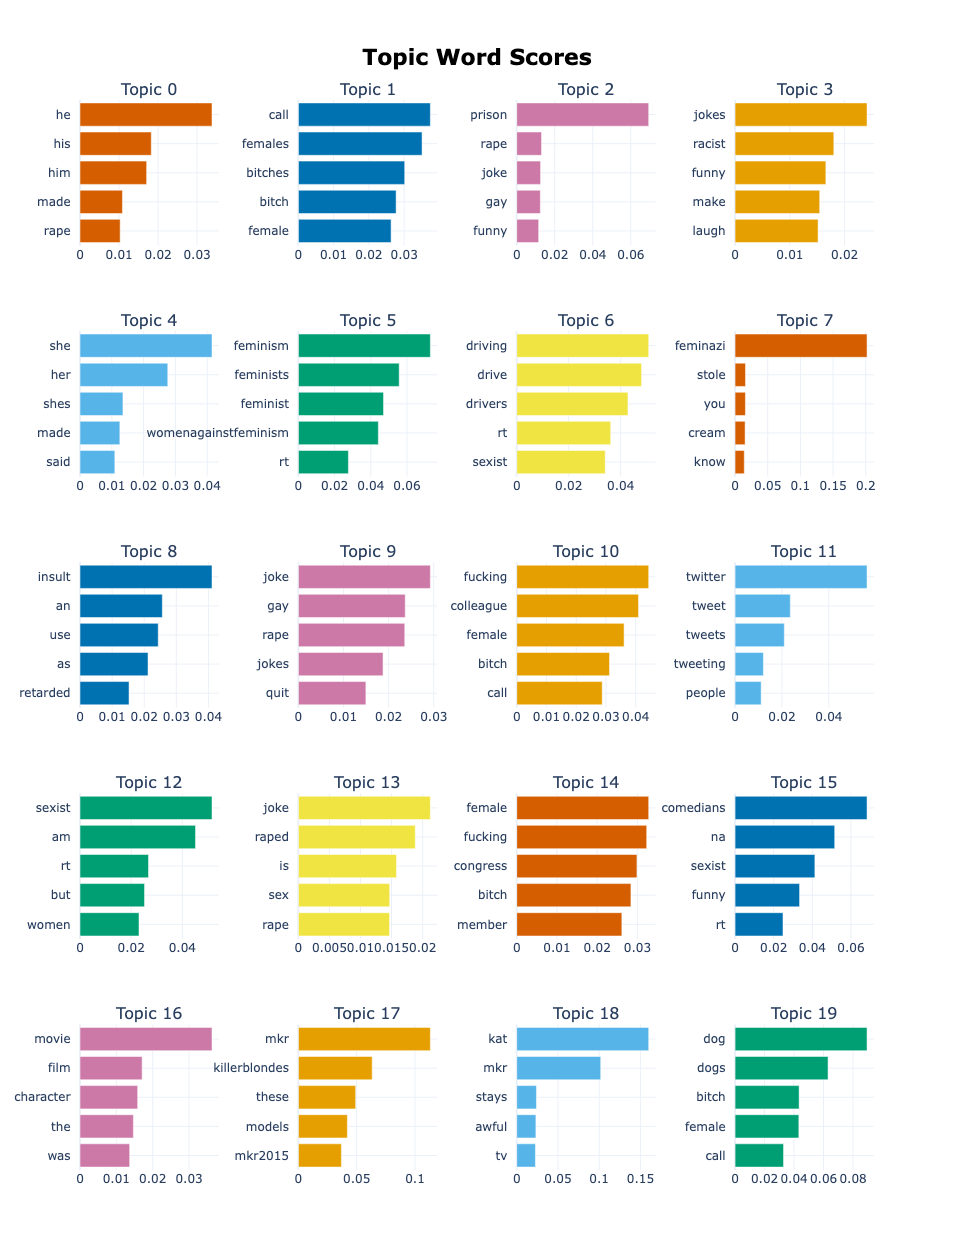

In [57]:
topic_models[1].visualize_barchart(top_n_topics=20)

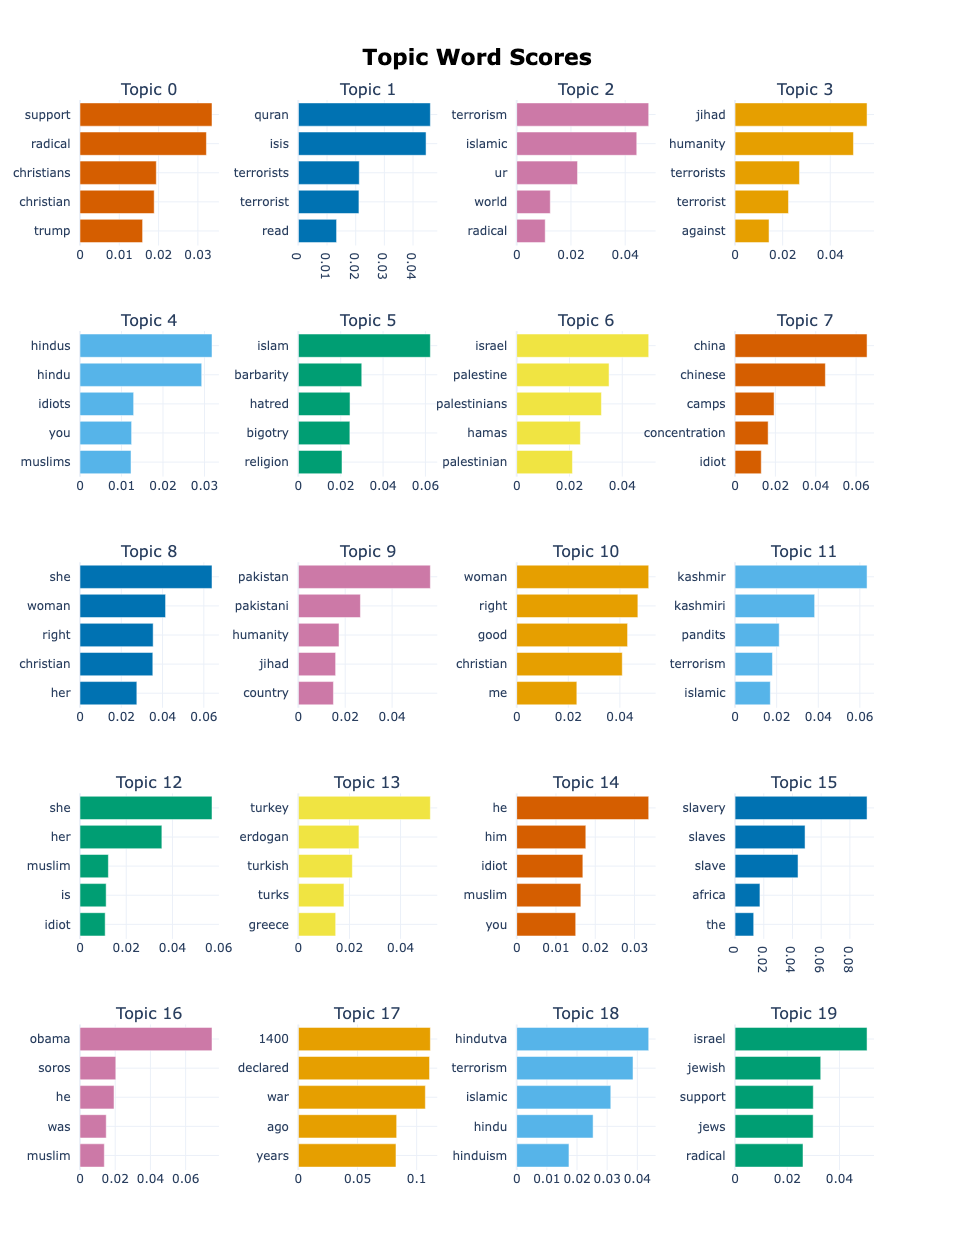

In [58]:
topic_models[2].visualize_barchart(top_n_topics=20)

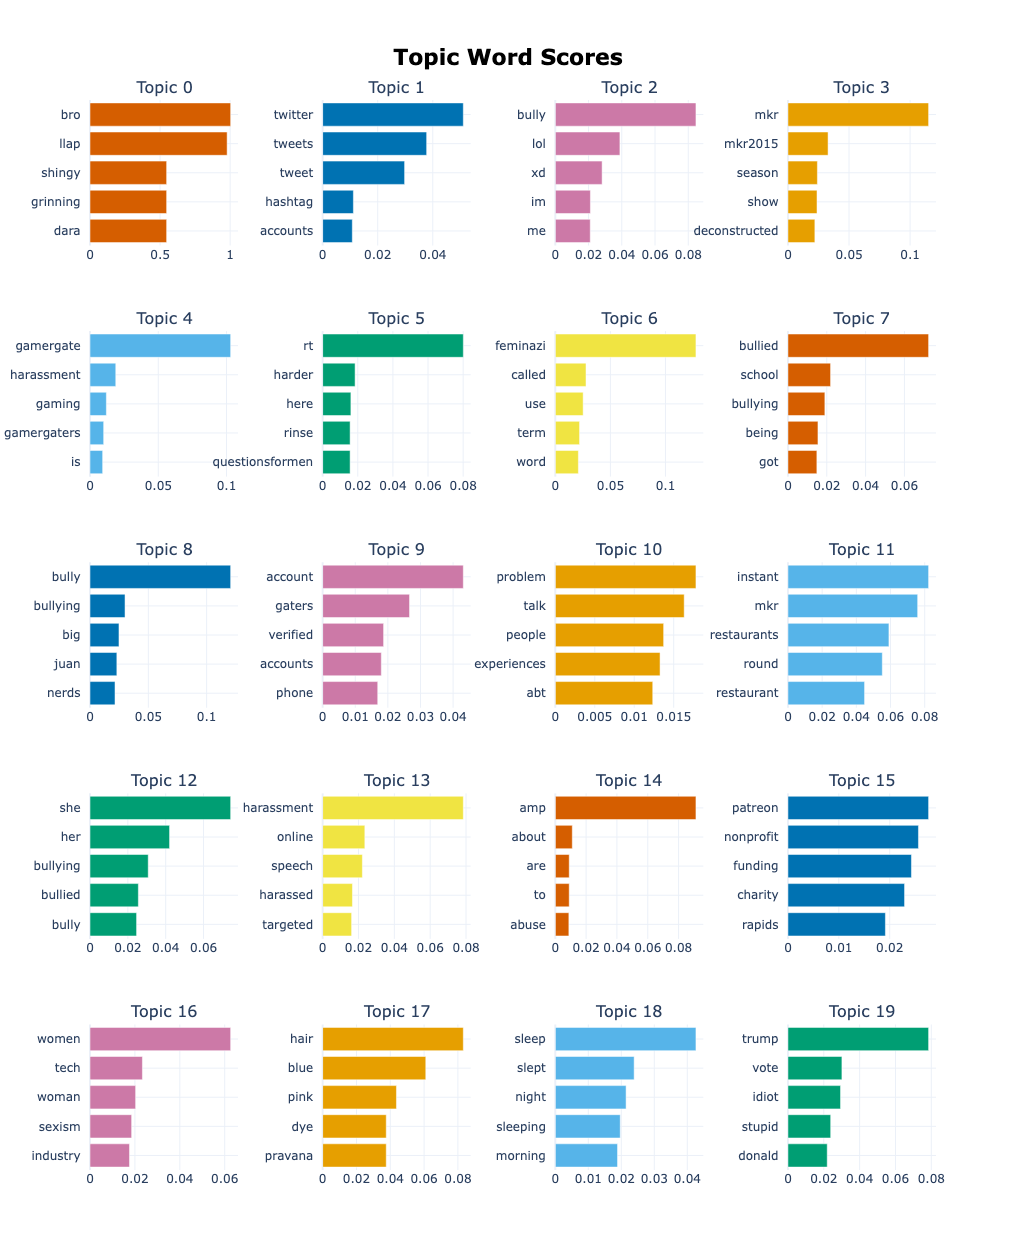

In [59]:
topic_models[3].visualize_barchart(top_n_topics=20)

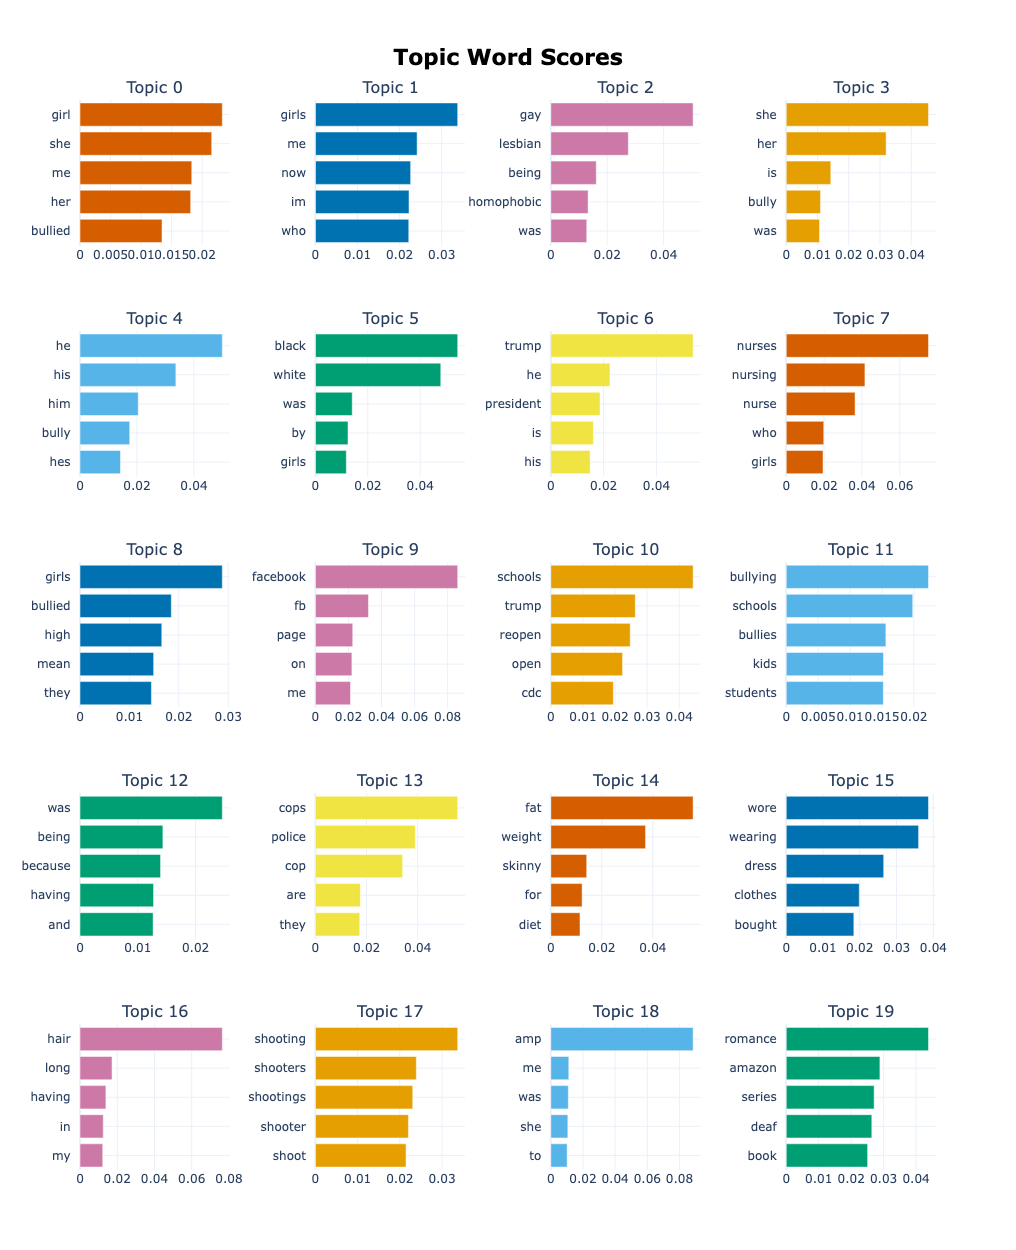

In [60]:
topic_models[4].visualize_barchart(top_n_topics=20)

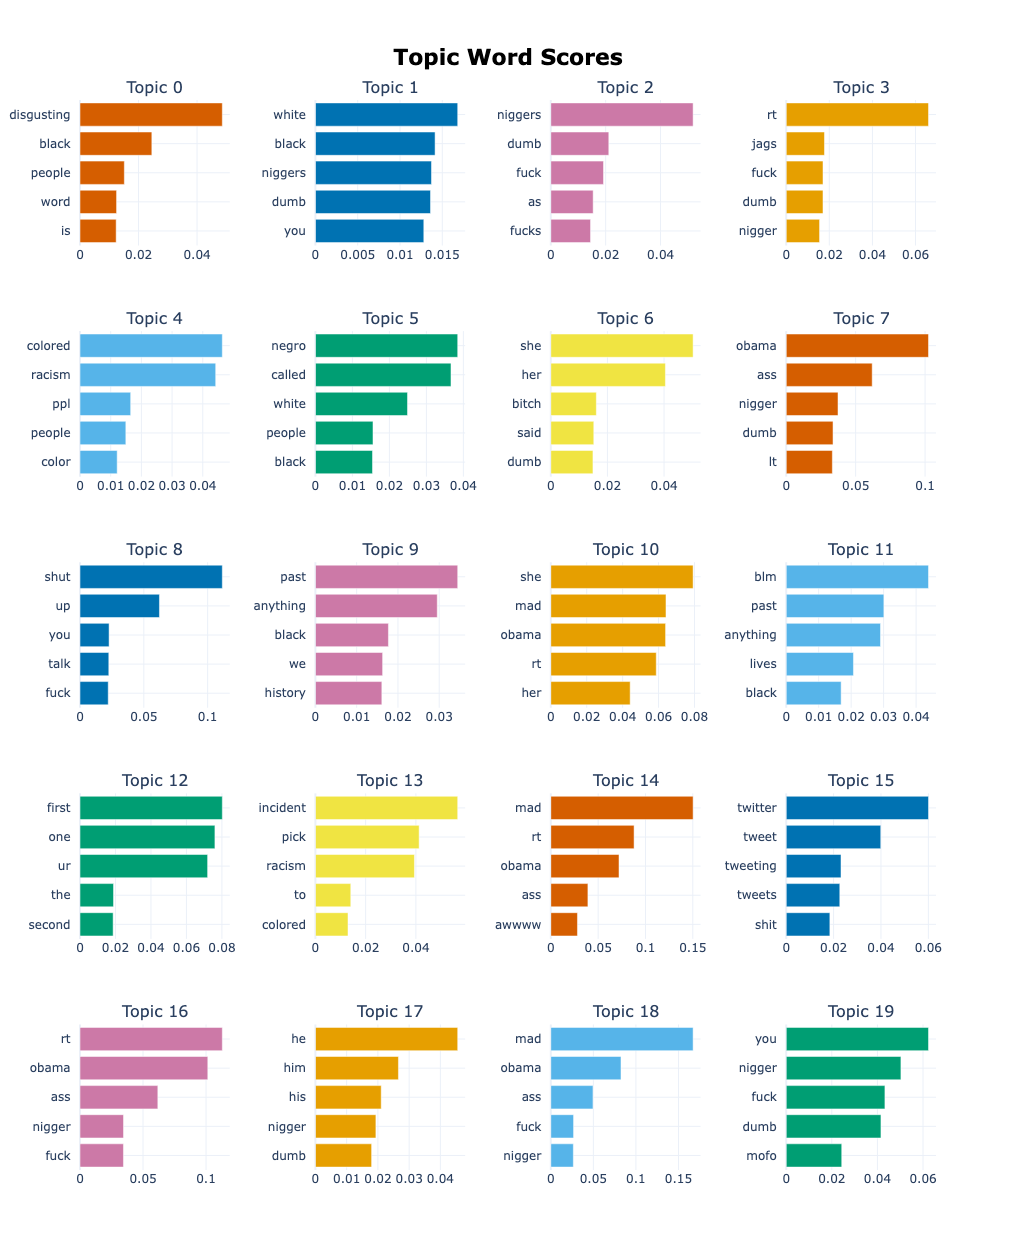

In [61]:
topic_models[5].visualize_barchart(top_n_topics=20)